In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

#### Step 1: State hypothesis

Null: She can't tell the difference

Alternate: She can tell the difference

#### Step 2: Test Statistic

The number of times she correctly picked tea first (hypergeometric problem)

In [16]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([1, 3, 2, 2, 2, 3, 1, 2, 4, 4])

#### Step 3: find p value

In [22]:
print(np.sum(stats.hypergeom.pmf([3,4],M,n,N)))
1-stats.hypergeom.cdf(2,M,n,N)

0.24285714285714263


0.24285714285714288

#### Step 4: Conclude

Fail to reject

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [24]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


#### Step 1: State hypothesis

Null: Same width

Alternate: Larger mean sepal width than Versicolor

#### Step 2: Find test statistic

Difference in means

#### Step 3: p value

In [29]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [33]:
num_obs=iris_sub.num_rows
ts=[]
for each in np.arange(10000):
    iris_sample=iris_sub.with_column('sampled', iris_sub.sample(num_obs, with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])

(array([   6.,   97.,  454., 1414., 2666., 2882., 1704.,  637.,  120.,
          20.]),
 array([-0.256, -0.206, -0.156, -0.106, -0.056, -0.006,  0.044,  0.094,
         0.144,  0.194,  0.244]),
 <a list of 10 Patch objects>)

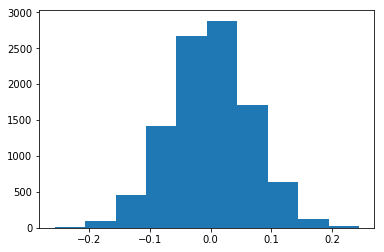

In [34]:
plt.hist(ts)

In [35]:
np.mean(ts>=obs)

0.0009

#### Step 4: Conclusion

Reject the Null